### 预测股票价格

In [12]:
#1获取股票数据
import pandas as pd
import quandl

df = quandl.get("WIKI/GOOGL")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [13]:
#削减原始的 DataFrame
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
print(df)

              Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume
Date                                                                       
2004-08-19    50.159839    52.191109    48.128568    50.322842   44659000.0
2004-08-20    50.661387    54.708881    50.405597    54.322689   22834300.0
2004-08-23    55.551482    56.915693    54.693835    54.869377   18256100.0
2004-08-24    55.792225    55.972783    51.945350    52.597363   15247300.0
2004-08-25    52.542193    54.167209    52.100830    53.164113    9188600.0
...                 ...          ...          ...          ...          ...
2018-03-21  1092.570000  1108.700000  1087.210000  1094.000000    1990515.0
2018-03-22  1080.010000  1083.920000  1049.640000  1053.150000    3418154.0
2018-03-23  1051.370000  1066.780000  1024.870000  1026.550000    2413517.0
2018-03-26  1050.600000  1059.270000  1010.580000  1054.090000    3272409.0
2018-03-27  1063.900000  1064.540000   997.620000  1006.940000    2940957.0

[3424 rows 

In [14]:
# 转换数据使得数据更加有用,并且定义新的DF
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
#定义新的df
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [15]:
# 获取特征和标签 使用numpy 和sklearn 模块开始机器学习
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
# 监督学习需要特征和标签 
'''
我们这里，什么是特征和标签呢？我们尝试预测价格，所以价格就是标签？如果这样，什么是特征呢？
对于预测我们的价格来说，我们的标签，就是我们打算预测的东西，实际上是未来价格。
这样，我们的特征实际上是：当前价格、HL 百分比和百分比变化。标签价格是未来某个点的价格。
'''
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
'''
最后，我们定义我们需要预测的东西。许多情况下，就像尝试预测客户的保费的案例中，你仅仅需要一个数字，
但是对于预测来说，你需要预测指定数量的数据点。我们假设我们打算预测数据集整个长度的 1%。
因此，如果我们的数据是 100 天的股票价格，我们需要能够预测未来一天的价格。选择你想要的那个。
如果你只是尝试预测明天的价格，你应该选取一天之后的数据，而且也只能一天之后的数据。
如果你打算预测 10 天，我们可以为每一天生成一个预测。
我们这里，我们决定了，特征是一系列当前值，标签是未来的价格，其中未来是数据集整个长度的 1%。
我们假设所有当前列都是我们的特征，所以我们使用一个简单的 Pnadas 操作添加一个新的列：label
'''
df['label'] = df[forecast_col].shift(-forecast_out)


In [ ]:
#训练和测试
#通常要定义X（大写）作为特征，和y（小写）作为对于特征的标签
df.dropna(inplace=True)
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])



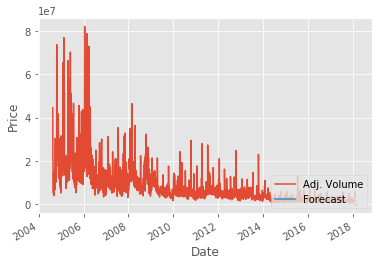

In [2]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

# 打乱数据
# 依次为训练集、测试集、标签的训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
# 定义分类器
clf = LinearRegression(n_jobs=-1)
# 使用svm训练分类器
clf.fit(X_train, y_train)
# 训练完毕后进行测试
confidence = clf.score(X_test, y_test)
# 预测 forecast_set是预测值的数组，表明你不仅仅可以做出单个预测，还可以一次性预测多个值
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

# 使用pyplot绘图
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]


df['Adj. Volume'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [31]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
#COMMENTED OUT:
##clf = svm.SVR(kernel='linear')
##clf.fit(X_train, y_train)
##confidence = clf.score(X_test, y_test)
##print(confidence)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'linearregression.pickle'